<a href="https://colab.research.google.com/github/pawanbhatta178/MovieRecommendation/blob/main/UVDecompositionMovieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Movie Rating Dataset: Movie Lens(2023)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
csv_path_ratings = '/content/drive/MyDrive/Grad/Data Mining/FinalProject/ml-32m/ratings.csv'
df_ratings = pd.read_csv(csv_path_ratings)

In [4]:
csv_path_movies = '/content/drive/MyDrive/Grad/Data Mining/FinalProject/ml-32m/movies.csv'
df_movies = pd.read_csv(csv_path_movies)

#### Review Dataset

We explore the review dataset from different user and the movie. One thing we can observe from the data is that, not all users will have reviewed all movies, in fact, each user only reviews certain movies. Using the limited reviews that a user has given, out goal is to predict movie review for the movies the user has not yet rated. If the predicted rating is high, we are more likely to recommend the user that movie.

In [5]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


#### Movie Dataset

We are going to be using this dataset to filter out movies from particular year of our interest (say 2023) in order to recommend.
- We dont want to recommend movie outside of that year because it would be unfeasible to run that unless we have really enormous compute.
- Also we want to recommend to user who has provided some review to these latest movies.  

In [7]:
df_movies.tail(20)

,movieId,title,genres
87565,292599,The Illusion of Abundance (2022),Documentary
87566,292601,Mountain Flesh (2022),Documentary
87567,292603,The Female Voice Of Afghanistan: Life After Li...,Documentary
87568,292605,Our River... Our Sky (2023),Drama|War
87569,292607,The Invention of the Other (2022),Documentary
87570,292609,The Wind Blows the Border (2022),Documentary
87571,292611,Kenya (2022),Documentary
87572,292613,Freelance (2023),Action|Comedy
87573,292615,Sparta (2022),Drama
87574,292617,Comeback (2023),Comedy|Drama


In [8]:
MOVIES_YEAR_OF_INTEREST='2023' # Select different year if you want to be recommended movie from any other year
MOVIE_GENRE_OF_INTEREST='Horror\|Thriller' # Select different genre if you want to be recommended movie from any other genre
MAX_USERS_COUNT=10
MAX_MOVIES_COUNT=10

In [9]:
df_movies_by_year=df_movies[df_movies['title'].str.contains(MOVIES_YEAR_OF_INTEREST) & df_movies['genres'].str.contains(MOVIE_GENRE_OF_INTEREST)].head(MAX_MOVIES_COUNT)
df_movies_by_year_count=df_movies_by_year.shape[0]
print(f"Movies Year ({MOVIES_YEAR_OF_INTEREST}) Count: ",df_movies_by_year_count )
df_movies_by_year.head(20)

Movies Year (2023) Count:  10


,movieId,title,genres
84340,281914,Run Rabbit Run (2023),Horror|Thriller
84604,282559,Landlocked (2023),Fantasy|Horror|Thriller
84670,282713,The Devil Conspiracy (2023),Horror|Thriller
84853,283191,Blood (2023),Horror|Thriller
85027,283603,Consecration (2023),Horror|Thriller
85100,283763,Winnie the Pooh: Blood and Honey (2023),Horror|Thriller
85247,284445,The Knocking (2023),Horror|Thriller
85544,285867,Nefarious (2023),Horror|Thriller
85587,285981,Clock (2023),Horror|Thriller
85599,286027,Gaslight (2023),Horror|Thriller


In [10]:
df_ratings_by_year=df_ratings[df_ratings['movieId'].isin(df_movies_by_year['movieId'])]

In [11]:
# Find users with top 10 ratings
top_users = (
    df_ratings_by_year
    .groupby('userId')
    .size()  # counts number of ratings per user
    .sort_values(ascending=False)
    .head(MAX_USERS_COUNT)  # top 10 users
    .reset_index(name='num_ratings')  # convert to DataFrame
)


In [12]:
df_ratings_by_year= df_ratings_by_year[df_ratings_by_year['userId'].isin(top_users['userId'])]

In [13]:
df_ratings_by_year_count=df_ratings_by_year.shape[0]
print(f"Reviews Year ({MOVIES_YEAR_OF_INTEREST}) Count: ",df_ratings_by_year_count )
df_ratings_by_year.head(20)

Reviews Year (2023) Count:  25


,userId,movieId,rating,timestamp
781981,5124,285867,3.5,1693778091
781982,5124,285981,2.0,1693778093
4680236,29261,285867,4.0,1686301791
4680239,29261,285981,4.0,1683064983
5507943,34365,283603,2.5,1676013902
5507945,34365,283763,1.0,1676524770
7596398,47557,281914,4.0,1691717019
7596412,47557,285981,3.5,1686296721
12679603,79374,283191,3.5,1687802013
12679609,79374,285981,2.5,1687294453


### UV Factorization

In order to predict movie review for some selected user we plan to use UV Factorization techique. For this, we have 2 steps:
1. Create a matrix of user and rating.
2. Use algorithm for UV Factorization to come up with smaller matrices (U,V) with arbitrary latent features  
3. Predict the missing rating for all the users in the original matrix


##### Create a matrix of user and rating.

In [14]:
# Pivot to create user × movie matrix with ratings
rating_matrix = df_ratings_by_year.pivot(index='userId', columns='movieId', values='rating')

print(rating_matrix)

movieId  281914  282713  283191  283603  283763  285867  285981
userId                                                         
5124        NaN     NaN     NaN     NaN     NaN     3.5     2.0
29261       NaN     NaN     NaN     NaN     NaN     4.0     4.0
34365       NaN     NaN     NaN     2.5     1.0     NaN     NaN
47557       4.0     NaN     NaN     NaN     NaN     NaN     3.5
79374       NaN     NaN     3.5     NaN     NaN     NaN     2.5
108412      3.5     5.0     NaN     5.0     2.5     NaN     NaN
122544      NaN     NaN     NaN     NaN     NaN     0.5     3.5
133425      NaN     NaN     NaN     NaN     NaN     3.0     1.0
140377      NaN     3.0     NaN     NaN     3.5     NaN     NaN
184325      NaN     2.0     2.5     3.0     4.5     4.0     NaN


##### Preprocessing

Because the differences in the quality of items and the rating scales of users are
such important factors in determining the missing elements of the matrix M, it
is often useful to remove these influences before doing anything else.

- We can subtract from each nonblank element
mij the average rating of user i. Then, the resulting matrix can be modified
by subtracting the average rating (in the modified matrix) of item

In [15]:
rating_matrix_mean=rating_matrix.mean(axis=1)
rating_matrix_normalized = rating_matrix.sub(rating_matrix_mean, axis=0)

print( rating_matrix_normalized )

movieId  281914  282713  283191  283603  283763  285867  285981
userId                                                         
5124        NaN     NaN     NaN     NaN     NaN    0.75   -0.75
29261       NaN     NaN     NaN     NaN     NaN    0.00    0.00
34365       NaN     NaN     NaN    0.75   -0.75     NaN     NaN
47557      0.25     NaN     NaN     NaN     NaN     NaN   -0.25
79374       NaN     NaN     0.5     NaN     NaN     NaN   -0.50
108412    -0.50    1.00     NaN    1.00   -1.50     NaN     NaN
122544      NaN     NaN     NaN     NaN     NaN   -1.50    1.50
133425      NaN     NaN     NaN     NaN     NaN    1.00   -1.00
140377      NaN   -0.25     NaN     NaN    0.25     NaN     NaN
184325      NaN   -1.20    -0.7   -0.20    1.30    0.80     NaN


##### UV Factorization Algorithm

1. We implement the UV Factorization Algorithm
2. We also try different values of k (latent factors), learning rate and regularization as hyperparamter tuning.

In [36]:
from sklearn.metrics import mean_squared_error

# Computer RMSE with mask, we need mask because we want to ignore the error for masked positions since they are unknown anyway and there is no way to calculate error
def compute_rmse(true_matrix, predicted_matrix, mask):
    true_ratings = true_matrix[mask]
    predicted_ratings = predicted_matrix[mask]
    return np.sqrt(mean_squared_error(true_ratings, predicted_ratings))

In [62]:
import numpy as np
import pandas as pd

# Convert to numpy array, fill NaNs with 0 for computation
R = rating_matrix_normalized.fillna(0).values
num_users, num_movies = R.shape

# Initialize U and V with random values
np.random.seed(42)

# Mask matrix: 1 where rating exists, 0 where missing
mask = ~rating_matrix.isna().values

alphas=[0.005, 0.01, 0.05] # learning rate
lambda_regs=[0.01, 0.1, 1.0]  # regularization
k_values=[2,3,4,5,6,7]
results = []


for alpha in alphas:
    for lambda_reg in lambda_regs:
        for k in k_values:
          U = np.random.rand(num_users, k)
          V = np.random.rand(num_movies, k)

          epochs = 1000

          # Training loop
          for epoch in range(epochs):
              for i in range(num_users):
                  for j in range(num_movies):
                      if mask[i, j]:
                          # Compute error
                          eij = R[i, j] - np.dot(U[i, :], V[j, :])
                          # Gradient descent updates
                          U[i, :] += alpha * (eij * V[j, :] - lambda_reg * U[i, :])
                          V[j, :] += alpha * (eij * U[i, :] - lambda_reg * V[j, :])

          # Predicted full matrix
          predicted_ratings = np.dot(U, V.T)

          # Convert back to DataFrame for readability
          predicted_df_normalized = pd.DataFrame(predicted_ratings, index=rating_matrix_normalized.index, columns=rating_matrix_normalized.columns)
          predicted_df = predicted_df_normalized.add(rating_matrix_mean, axis=0)
          predicted=predicted_df.values

          rmse = compute_rmse(R, predicted , mask)
          print(f"k={k}, alpha={alpha}, lambda={lambda_reg}, RMSE={rmse:.4f}")
          # print("U:",U)
          # print("V:",V)
          # print("Predicted Ratings:")
          # print(predicted.round(2))

          results.append((k, alpha, lambda_reg, rmse, U, V, predicted))



k=2, alpha=0.005, lambda=0.01, RMSE=3.1855
k=3, alpha=0.005, lambda=0.01, RMSE=3.1712
k=4, alpha=0.005, lambda=0.01, RMSE=3.1734
k=5, alpha=0.005, lambda=0.01, RMSE=3.1712
k=6, alpha=0.005, lambda=0.01, RMSE=3.1727
k=7, alpha=0.005, lambda=0.01, RMSE=3.1724
k=2, alpha=0.005, lambda=0.1, RMSE=3.1647
k=3, alpha=0.005, lambda=0.1, RMSE=3.1661
k=4, alpha=0.005, lambda=0.1, RMSE=3.1601
k=5, alpha=0.005, lambda=0.1, RMSE=3.1641
k=6, alpha=0.005, lambda=0.1, RMSE=3.1644
k=7, alpha=0.005, lambda=0.1, RMSE=3.1614
k=2, alpha=0.005, lambda=1.0, RMSE=3.2863
k=3, alpha=0.005, lambda=1.0, RMSE=3.2863
k=4, alpha=0.005, lambda=1.0, RMSE=3.2863
k=5, alpha=0.005, lambda=1.0, RMSE=3.2863
k=6, alpha=0.005, lambda=1.0, RMSE=3.2862
k=7, alpha=0.005, lambda=1.0, RMSE=3.2862
k=2, alpha=0.01, lambda=0.01, RMSE=3.1695
k=3, alpha=0.01, lambda=0.01, RMSE=3.1664
k=4, alpha=0.01, lambda=0.01, RMSE=3.1712
k=5, alpha=0.01, lambda=0.01, RMSE=3.1716
k=6, alpha=0.01, lambda=0.01, RMSE=3.1721
k=7, alpha=0.01, lambda=0.01

In [54]:
import pandas as pd

# Assume `results` is a list of tuples: (k, alpha, lambda_reg, rmse, U, V, predicted)
results_df = pd.DataFrame(results, columns=['k', 'alpha', 'lambda_reg', 'rmse', 'U', 'V', 'predicted'])

# Sort by RMSE (optional)
results_df_sorted = results_df.sort_values(by='rmse').reset_index(drop=True)

# Display summary (only relevant columns)
summary_df = results_df_sorted[['k', 'alpha', 'lambda_reg', 'rmse']]

top_n = 7
summary_df.head(top_n)

,k,alpha,lambda_reg,rmse
0,4,0.005,0.1,3.160114
1,7,0.005,0.1,3.161433
2,4,0.010,0.1,3.163050
3,7,0.010,0.1,3.163681
4,3,0.010,0.1,3.164048
5,6,0.010,0.1,3.164088
6,5,0.005,0.1,3.164119


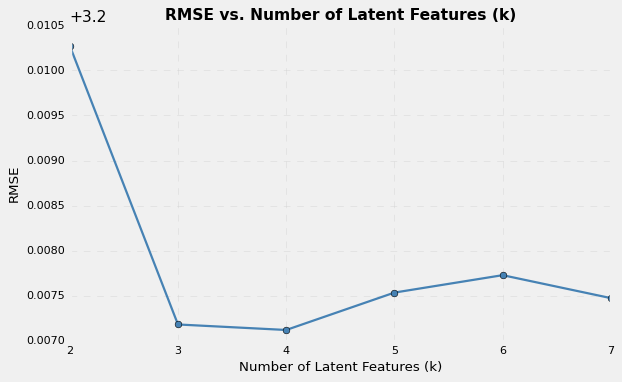

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert your results to a DataFrame
df = pd.DataFrame(results, columns=['k', 'alpha', 'lambda_reg', 'rmse', 'U', 'V', 'predicted'])

# Group by `k` and compute average RMSE
rmse_by_k = df.groupby('k')['rmse'].mean().reset_index()

# Apply a clean style
plt.style.use('fivethirtyeight')  # or 'classic', 'bmh', 'fivethirtyeight'

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(rmse_by_k['k'], rmse_by_k['rmse'], marker='o', linewidth=2, color='steelblue')

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Titles and labels
plt.title('RMSE vs. Number of Latent Features (k)', fontsize=14, weight='bold')
plt.xlabel('Number of Latent Features (k)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

# Tick customization
plt.xticks(rmse_by_k['k'], fontsize=10)
plt.yticks(fontsize=10)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()
